# EUR/USD Hour x Minute Preprocessing

Using the datasource http://www.forextester.com/data/datasources to download EURUSD.zip. Converting the provided .txt file to .csv. The following code transformes the raw data into 2D inputs used for the CNN.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
filename="EURUSD.csv"
data = pd.read_csv (filename, sep="," ,dtype={'<DTYYYYMMDD>':str,'<TIME>':str})

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6239078 entries, 0 to 6239077
Data columns (total 8 columns):
<TICKER>        object
<DTYYYYMMDD>    object
<TIME>          object
<OPEN>          float64
<HIGH>          float64
<LOW>           float64
<CLOSE>         float64
<VOL>           int64
dtypes: float64(4), int64(1), object(3)
memory usage: 380.8+ MB


In [4]:
data["datetime"]=data['<DTYYYYMMDD>']+data['<TIME>']
data.head()

,<TICKER>,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,datetime
0,EURUSD,20010102,230100,0.9507,0.9507,0.9507,0.9507,4,20010102230100
1,EURUSD,20010102,230200,0.9506,0.9506,0.9505,0.9505,4,20010102230200
2,EURUSD,20010102,230300,0.9505,0.9507,0.9505,0.9506,4,20010102230300
3,EURUSD,20010102,230400,0.9506,0.9506,0.9506,0.9506,4,20010102230400
4,EURUSD,20010102,230500,0.9506,0.9506,0.9506,0.9506,4,20010102230500


In [5]:
data['datetime']=pd.to_datetime(data['datetime'], format="%Y%m%d%H%M%S")
data.loc[:,'day']=data.loc[:,'datetime'].dt.strftime('%a')
data.head()

,<TICKER>,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,datetime,day
0,EURUSD,20010102,230100,0.9507,0.9507,0.9507,0.9507,4,2001-01-02 23:01:00,Tue
1,EURUSD,20010102,230200,0.9506,0.9506,0.9505,0.9505,4,2001-01-02 23:02:00,Tue
2,EURUSD,20010102,230300,0.9505,0.9507,0.9505,0.9506,4,2001-01-02 23:03:00,Tue
3,EURUSD,20010102,230400,0.9506,0.9506,0.9506,0.9506,4,2001-01-02 23:04:00,Tue
4,EURUSD,20010102,230500,0.9506,0.9506,0.9506,0.9506,4,2001-01-02 23:05:00,Tue


In [6]:
data.rename (columns={'<CLOSE>': 'close'}, inplace=True)
data=data.loc[:,['datetime','day','close']]
data.head()

,datetime,day,close
0,2001-01-02 23:01:00,Tue,0.9507
1,2001-01-02 23:02:00,Tue,0.9505
2,2001-01-02 23:03:00,Tue,0.9506
3,2001-01-02 23:04:00,Tue,0.9506
4,2001-01-02 23:05:00,Tue,0.9506


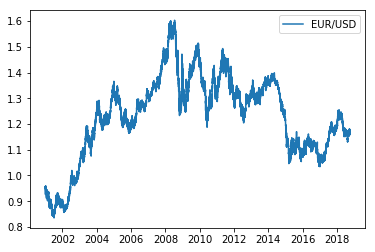

In [8]:
import matplotlib.pyplot as plt
plt.plot(data['datetime'],data['close'], label="EUR/USD")
plt.legend()
plt.show()

In [9]:
data.loc[:,'hour']=data.loc[:,'datetime'].dt.hour
data.loc[:,'minute']=data.loc[:,'datetime'].dt.minute
data.loc[:,'date']=data.loc[:,'datetime'].dt.date

In [10]:
p=pd.pivot_table(data,index=["hour"], columns=["day"],values=["close"], aggfunc='count')
week_order=['Mon','Tue','Wed','Thu','Fri','Sun']
p=p.reindex(columns=week_order,level=1)
print(p)

        close                                             
day       Mon      Tue      Wed      Thu      Fri      Sun
hour                                                      
0     52138.0  51964.0  52199.0  51884.0  52006.0      NaN
1     51743.0  51848.0  52120.0  51879.0  51990.0      NaN
2     51403.0  51613.0  51880.0  51771.0  51666.0      NaN
3     51104.0  51268.0  51626.0  51488.0  51394.0      NaN
4     51222.0  51533.0  51737.0  51750.0  51644.0      NaN
5     51515.0  51952.0  52140.0  52175.0  51937.0      NaN
6     52996.0  53258.0  53575.0  53484.0  53380.0      NaN
7     53683.0  54081.0  54312.0  54339.0  54109.0      NaN
8     53654.0  53982.0  54102.0  54271.0  54117.0      NaN
9     53258.0  53809.0  53943.0  54026.0  53921.0      NaN
10    53216.0  53732.0  53690.0  53855.0  53849.0      NaN
11    53329.0  53788.0  53855.0  53954.0  53942.0      NaN
12    53565.0  54011.0  54108.0  54188.0  54300.0      NaN
13    53821.0  54245.0  54396.0  54497.0  54552.0      N

In [11]:
from datetime import timedelta
data.loc[:,"datetime"]=data.loc[:,"datetime"]+timedelta(hours=2)
data.loc[:,"hour"] = data.loc[:,"datetime"].dt.hour
data.loc[:,'day']=data.loc[:,'datetime'].dt.strftime('%a')
data.loc[:,'date']=data.loc[:,'datetime'].dt.date
data.head(25)

,datetime,day,close,hour,minute,date
0,2001-01-03 01:01:00,Wed,0.9507,1,1,2001-01-03
1,2001-01-03 01:02:00,Wed,0.9505,1,2,2001-01-03
2,2001-01-03 01:03:00,Wed,0.9506,1,3,2001-01-03
3,2001-01-03 01:04:00,Wed,0.9506,1,4,2001-01-03
4,2001-01-03 01:05:00,Wed,0.9506,1,5,2001-01-03
5,2001-01-03 01:06:00,Wed,0.9506,1,6,2001-01-03
6,2001-01-03 01:07:00,Wed,0.9507,1,7,2001-01-03
7,2001-01-03 01:08:00,Wed,0.9507,1,8,2001-01-03
8,2001-01-03 01:09:00,Wed,0.9507,1,9,2001-01-03
9,2001-01-03 01:10:00,Wed,0.9507,1,10,2001-01-03


In [12]:
p2=pd.pivot_table(data,index=["hour"], columns=["day"],values=["close"], aggfunc='count')
week_order=['Mon','Tue','Wed','Thu','Fri','Sun']
p2=p2.reindex(columns=week_order,level=1)
print(p2)

      close                            
day     Mon    Tue    Wed    Thu    Fri
hour                                   
0     29866  50971  51416  51218  51076
1     51003  51240  51555  51256  51312
2     52138  51964  52199  51884  52006
3     51743  51848  52120  51879  51990
4     51403  51613  51880  51771  51666
5     51104  51268  51626  51488  51394
6     51222  51533  51737  51750  51644
7     51515  51952  52140  52175  51937
8     52996  53258  53575  53484  53380
9     53683  54081  54312  54339  54109
10    53654  53982  54102  54271  54117
11    53258  53809  53943  54026  53921
12    53216  53732  53690  53855  53849
13    53329  53788  53855  53954  53942
14    53565  54011  54108  54188  54300
15    53821  54245  54396  54497  54552
16    53975  54426  54444  54548  54587
17    53960  54408  54437  54507  54656
18    53599  54146  54192  54281  54247
19    53049  53701  53648  53795  53558
20    52553  53261  53328  53120  53121
21    51761  52405  52440  52145  52015


In [13]:
data_mat = data.loc[:,["date","hour","minute","close"]]
data_mat.set_index (['date','hour', 'minute'], inplace=True, drop=True)
data_mat.head()

close
date       hour minute        
2001-01-03 1    1       0.9507
                2       0.9505
                3       0.9506
                4       0.9506
                5       0.9506

In [14]:
data_mat=data_mat.unstack(level=2)
data_mat.head()

close                                                  \
minute               0       1       2       3       4       5       6    
date       hour                                                           
2001-01-03 1        NaN  0.9507  0.9505  0.9506  0.9506  0.9506  0.9506   
           2     0.9507  0.9507  0.9507  0.9507  0.9507  0.9507  0.9506   
           3     0.9496  0.9496  0.9496  0.9495  0.9495     NaN  0.9495   
           4     0.9502  0.9500  0.9500  0.9499  0.9500  0.9500  0.9500   
           5     0.9500  0.9500  0.9500  0.9500  0.9500  0.9500  0.9500   

                                          ...                            \
minute               7       8       9    ...        50      51      52   
date       hour                           ...                             
2001-01-03 1     0.9507  0.9507  0.9507   ...    0.9506  0.9506  0.9506   
           2     0.9506  0.9506  0.9506   ...    0.9496  0.9496  0.9496   
           3     0.9496  0.9498  0.9498   ...    0.9504  0.9504  0.9505   
           4     0.9498  0.9499  0.9498   ...    0.9499  0.9499  0.9499   
           5     0.9500  0.9500  0.9500   ...    0.9503  0.9503  0.9503   

                                                                         
minute               53      54      55      56      57      58      59  
date       hour                                                          
2001-01-03 1     0.9507  0.9506  0.9507  0.9507  0.9507  0.9507  0.9506  
           2     0.9495  0.9492  0.9493  0.9497  0.9496  0.9496  0.9496  
           3     0.9506  0.9506  0.9506  0.9506  0.9506  0.9505  0.9505  
           4     0.9499  0.9499  0.9499  0.9499  0.9499  0.9499  0.9499  
           5     0.9503  0.9503  0.9503  0.9503     NaN  0.9503  0.9503  

[5 rows x 60 columns]

In [15]:
data_new=data_mat.reset_index(drop=True)

In [16]:
data_new.head()

close                                                          \
minute      0       1       2       3       4       5       6       7    
0          NaN  0.9507  0.9505  0.9506  0.9506  0.9506  0.9506  0.9507   
1       0.9507  0.9507  0.9507  0.9507  0.9507  0.9507  0.9506  0.9506   
2       0.9496  0.9496  0.9496  0.9495  0.9495     NaN  0.9495  0.9496   
3       0.9502  0.9500  0.9500  0.9499  0.9500  0.9500  0.9500  0.9498   
4       0.9500  0.9500  0.9500  0.9500  0.9500  0.9500  0.9500  0.9500   

                         ...                                            \
minute      8       9    ...        50      51      52      53      54   
0       0.9507  0.9507   ...    0.9506  0.9506  0.9506  0.9507  0.9506   
1       0.9506  0.9506   ...    0.9496  0.9496  0.9496  0.9495  0.9492   
2       0.9498  0.9498   ...    0.9504  0.9504  0.9505  0.9506  0.9506   
3       0.9499  0.9498   ...    0.9499  0.9499  0.9499  0.9499  0.9499   
4       0.9500  0.9500   ...    0.9503  0.9503  0.9503  0.9503  0.9503   

                                                
minute      55      56      57      58      59  
0       0.9507  0.9507  0.9507  0.9507  0.9506  
1       0.9493  0.9497  0.9496  0.9496  0.9496  
2       0.9506  0.9506  0.9506  0.9505  0.9505  
3       0.9499  0.9499  0.9499  0.9499  0.9499  
4       0.9503  0.9503     NaN  0.9503  0.9503  

[5 rows x 60 columns]

# Dealing with NaN values

In [17]:
data_new=data_new.T
data_new.head()

0       1       2       3       4       5       6       7       \
      minute                                                                   
close 0          NaN  0.9507  0.9496  0.9502    0.95  0.9503  0.9506     NaN   
      1       0.9507  0.9507  0.9496  0.9500    0.95  0.9504  0.9506  0.9505   
      2       0.9505  0.9507  0.9496  0.9500    0.95  0.9504  0.9506  0.9504   
      3       0.9506  0.9507  0.9495  0.9499    0.95  0.9504  0.9506  0.9504   
      4       0.9506  0.9507  0.9495  0.9500    0.95  0.9504  0.9506  0.9504   

              8       9        ...    108702  108703  108704  108705  108706  \
      minute                   ...                                             
close 0       0.9509  0.9490   ...    1.1580  1.1585  1.1579  1.1615  1.1623   
      1       0.9510  0.9494   ...    1.1581  1.1583  1.1581  1.1613  1.1621   
      2       0.9509  0.9496   ...    1.1579  1.1584  1.1584  1.1615  1.1621   
      3       0.9506  0.9502   ...    1.1579  1.1587  1.1585  1.1616  1.1620   
      4       0.9502  0.9506   ...    1.1577  1.1589  1.1586  1.1613  1.1621   

              108707  108708  108709  108710  108711  
      minute                                          
close 0       1.1611  1.1612  1.1612  1.1610  1.1603  
      1       1.1611  1.1612  1.1610  1.1610  1.1604  
      2       1.1610  1.1611  1.1612  1.1608  1.1604  
      3       1.1610  1.1610  1.1612  1.1606  1.1604  
      4       1.1610  1.1609  1.1612  1.1606  1.1603  

[5 rows x 108712 columns]

In [18]:
data_new.fillna(method='bfill',inplace=True)
data_new.fillna(method='ffill',inplace=True)
data_new.head(24)

0       1       2       3       4       5       6       7       \
      minute                                                                   
close 0       0.9507  0.9507  0.9496  0.9502  0.9500  0.9503  0.9506  0.9505   
      1       0.9507  0.9507  0.9496  0.9500  0.9500  0.9504  0.9506  0.9505   
      2       0.9505  0.9507  0.9496  0.9500  0.9500  0.9504  0.9506  0.9504   
      3       0.9506  0.9507  0.9495  0.9499  0.9500  0.9504  0.9506  0.9504   
      4       0.9506  0.9507  0.9495  0.9500  0.9500  0.9504  0.9506  0.9504   
      5       0.9506  0.9507  0.9495  0.9500  0.9500  0.9504  0.9506  0.9504   
      6       0.9506  0.9506  0.9495  0.9500  0.9500  0.9504  0.9506  0.9504   
      7       0.9507  0.9506  0.9496  0.9498  0.9500  0.9504  0.9506  0.9504   
      8       0.9507  0.9506  0.9498  0.9499  0.9500  0.9504  0.9506  0.9504   
      9       0.9507  0.9506  0.9498  0.9498  0.9500  0.9505  0.9506  0.9504   
      10      0.9507  0.9506  0.9499  0.9498  0.9502  0.9505  0.9507  0.9504   
      11      0.9507  0.9506  0.9499  0.9498  0.9500  0.9505  0.9507  0.9503   
      12      0.9507  0.9506  0.9499  0.9498  0.9500  0.9505  0.9507  0.9503   
      13      0.9507  0.9506  0.9500  0.9498  0.9500  0.9505  0.9507  0.9504   
      14      0.9507  0.9506  0.9500  0.9498  0.9500  0.9505  0.9507  0.9504   
      15      0.9507  0.9506  0.9500  0.9502  0.9500  0.9505  0.9507  0.9504   
      16      0.9506  0.9506  0.9500  0.9503  0.9500  0.9505  0.9506  0.9507   
      17      0.9507  0.9506  0.9502  0.9503  0.9500  0.9505  0.9506  0.9509   
      18      0.9507  0.9506  0.9504  0.9503  0.9500  0.9504  0.9506  0.9513   
      19      0.9507  0.9506  0.9505  0.9503  0.9502  0.9504  0.9505  0.9513   
      20      0.9507  0.9506  0.9505  0.9503  0.9502  0.9504  0.9505  0.9513   
      21      0.9507  0.9506  0.9505  0.9503  0.9502  0.9504  0.9506  0.9513   
      22      0.9507  0.9507  0.9506  0.9508  0.9502  0.9504  0.9506  0.9513   
      23      0.9507  0.9507  0.9506  0.9507  0.9502  0.9504  0.9505  0.9513   

              8       9        ...    108702  108703  108704  108705  108706  \
      minute                   ...                                             
close 0       0.9509  0.9490   ...    1.1580  1.1585  1.1579  1.1615  1.1623   
      1       0.9510  0.9494   ...    1.1581  1.1583  1.1581  1.1613  1.1621   
      2       0.9509  0.9496   ...    1.1579  1.1584  1.1584  1.1615  1.1621   
      3       0.9506  0.9502   ...    1.1579  1.1587  1.1585  1.1616  1.1620   
      4       0.9502  0.9506   ...    1.1577  1.1589  1.1586  1.1613  1.1621   
      5       0.9497  0.9506   ...    1.1576  1.1591  1.1583  1.1612  1.1620   
      6       0.9491  0.9507   ...    1.1578  1.1587  1.1582  1.1615  1.1623   
      7       0.9489  0.9507   ...    1.1576  1.1585  1.1583  1.1613  1.1623   
      8       0.9481  0.9512   ...    1.1575  1.1586  1.1583  1.1615  1.1622   
      9       0.9482  0.9516   ...    1.1575  1.1587  1.1584  1.1617  1.1622   
      10      0.9481  0.9528   ...    1.1574  1.1590  1.1585  1.1618  1.1623   
      11      0.9476  0.9538   ...    1.1574  1.1590  1.1584  1.1620  1.1621   
      12      0.9480  0.9537   ...    1.1577  1.1590  1.1585  1.1621  1.1622   
      13      0.9484  0.9532   ...    1.1576  1.1587  1.1585  1.1622  1.1622   
      14      0.9486  0.9532   ...    1.1575  1.1588  1.1585  1.1623  1.1622   
      15      0.9485  0.9530   ...    1.1573  1.1586  1.1584  1.1621  1.1623   
      16      0.9483  0.9531   ...    1.1574  1.1586  1.1585  1.1618  1.1623   
      17      0.9479  0.9536   ...    1.1573  1.1586  1.1582  1.1627  1.1623   
      18      0.9478  0.9534   ...    1.1571  1.1586  1.1580  1.1624  1.1621   
      19      0.9479  0.9531   ...    1.1573  1.1587  1.1579  1.1624  1.1620   
      20      0.9477  0.9530   ...    1.1575  1.1586  1.1582  1.1621  1.1620   
      21      0.9476  0.9531   ...    1.1576  1.1585  1.1582  1.1620  1.1620   
      22     

In [19]:
data_new=data_new.T
data_new.head()

close                                                          \
minute      0       1       2       3       4       5       6       7    
0       0.9507  0.9507  0.9505  0.9506  0.9506  0.9506  0.9506  0.9507   
1       0.9507  0.9507  0.9507  0.9507  0.9507  0.9507  0.9506  0.9506   
2       0.9496  0.9496  0.9496  0.9495  0.9495  0.9495  0.9495  0.9496   
3       0.9502  0.9500  0.9500  0.9499  0.9500  0.9500  0.9500  0.9498   
4       0.9500  0.9500  0.9500  0.9500  0.9500  0.9500  0.9500  0.9500   

                         ...                                            \
minute      8       9    ...        50      51      52      53      54   
0       0.9507  0.9507   ...    0.9506  0.9506  0.9506  0.9507  0.9506   
1       0.9506  0.9506   ...    0.9496  0.9496  0.9496  0.9495  0.9492   
2       0.9498  0.9498   ...    0.9504  0.9504  0.9505  0.9506  0.9506   
3       0.9499  0.9498   ...    0.9499  0.9499  0.9499  0.9499  0.9499   
4       0.9500  0.9500   ...    0.9503  0.9503  0.9503  0.9503  0.9503   

                                                
minute      55      56      57      58      59  
0       0.9507  0.9507  0.9507  0.9507  0.9506  
1       0.9493  0.9497  0.9496  0.9496  0.9496  
2       0.9506  0.9506  0.9506  0.9505  0.9505  
3       0.9499  0.9499  0.9499  0.9499  0.9499  
4       0.9503  0.9503  0.9503  0.9503  0.9503  

[5 rows x 60 columns]

In [26]:
data_mat=data_new

# Y: Classification

In [48]:
hours_ahead=24

**Approach 1**

In [49]:
def prob_approach_1 (hours_ahead):
    p1=data_mat.median(axis=1)
    p1=p1.pct_change(hours_ahead)
    p1=p1.shift(hours_ahead*-1)
    p1=p1.iloc[:-hours_ahead]
    return p1

p1=prob_approach_1(hours_ahead)

In [50]:
p1.head()

0   -0.024140
1   -0.021565
2   -0.021883
3   -0.021474
4   -0.021521
dtype: float64

**Approach 2**

In [51]:
def prob_approach_2(hours_ahead):

    medians=data_mat.median(axis=1)

    p2=[]

    for i in range(len(medians)-hours_ahead):
        temp=(data_mat.loc[(i+1):(i+hours_ahead),:]/medians[i])-1
        p2.append(np.median(temp.values))

    p2=pd.Series(p2)
    return p2

p2=prob_approach_2(hours_ahead)

In [52]:
p2.head()

0   -0.000526
1   -0.000631
2   -0.001894
3   -0.002316
4   -0.003210
dtype: float64

**Two directional classes**

In [31]:
bins_2=[-1,0,1]

In [53]:
y1 = pd.cut (p1, bins=bins_2, include_lowest=True, labels=[0, 1])
y1.head()

0    0
1    0
2    0
3    0
4    0
dtype: category
Categories (2, int64): [0 < 1]

In [54]:
y2 = pd.cut (p2, bins=bins_2, include_lowest=True, labels=[0, 1])
y2.head()

0    0
1    0
2    0
3    0
4    0
dtype: category
Categories (2, int64): [0 < 1]

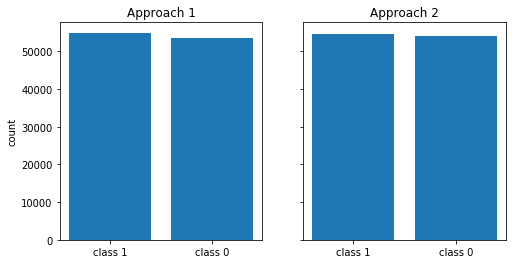

In [55]:
y1_counts=y1.value_counts()
y2_counts=y2.value_counts()

x=["class 1", "class 0"]
fig, axes = plt.subplots(1,2, sharey=True, figsize=(8,4))
axes[0].bar(x,y1_counts)
axes[0].set_ylabel("count")
axes[0].set_title("Approach 1")
axes[1].bar(x,y2_counts)
axes[1].set_title("Approach 2")
plt.show()

**Four directional classes**

In [56]:
hours_ahead_graph=[1,10,24]

In [36]:
pct1=[]
for i in hours_ahead_graph:
    temp=prob_approach_1(i)
    pct1.append(temp)

In [39]:
pct2=[]
for i in hours_ahead_graph:
    temp=prob_approach_2(i)
    pct2.append(temp)

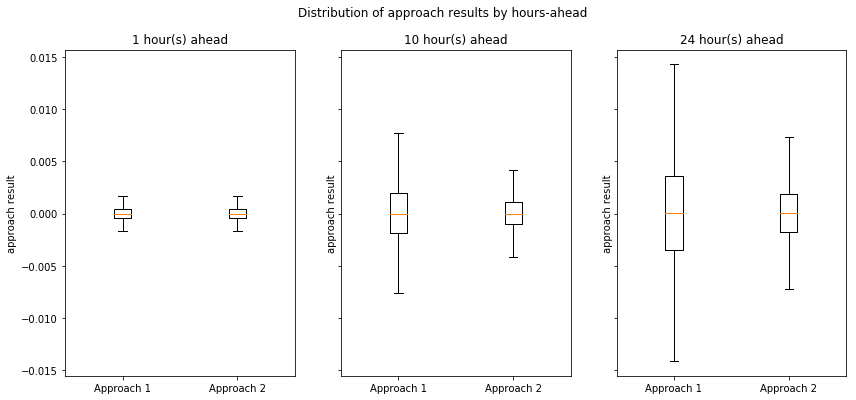

In [40]:
fig,axes = plt.subplots(1,3, figsize=(14,6), sharey=True)
fig.suptitle("Distribution of approach results by hours-ahead")

for i in range(len(hours_ahead_graph)):
    axes[i].set_title(str(hours_ahead_graph[i])+" hour(s) ahead")
    pct=[pct1[i], pct2[i]]
    pos=[1,2]
    axes[i].boxplot(pct, positions=pos, showfliers=False)
    axes[i].set_xticklabels(["Approach 1","Approach 2"])
    axes[i].set_ylabel("approach result")

plt.show()

In [41]:
n_classes=4

In [42]:
def bins_4classes(hours_ahead, approach):
    
    if approach==1:
        temp=prob_approach_1(hours_ahead)
    elif approach==2:
        temp=prob_approach_2(hours_ahead)
        
    p25=np.percentile(temp,25)
    p75=np.percentile(temp,75)
    mean=np.mean([-p25,p75])
    bins = [-1,round(-mean,4),0,round(mean,4),1]
    return bins

In [44]:
bins_4=[]
for i in [1,2]:
    bins_4.append(bins_4classes(24,i))
print (bins_4)

[[-1, -0.0036, 0, 0.0036, 1], [-1, -0.0018, 0, 0.0018, 1]]


In [57]:
y1_4class = pd.cut (p1, bins=bins_4[0], include_lowest=True, labels=[0,1,2,3])
y1_4class.head()

0    0
1    0
2    0
3    0
4    0
dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [58]:
y2_4class = pd.cut (p2, bins=bins_4[1], include_lowest=True, labels=[0,1,2,3])
y2_4class.head()

0    1
1    1
2    0
3    0
4    0
dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

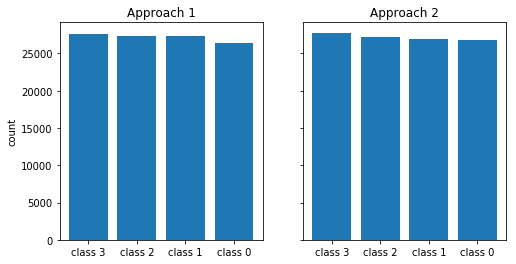

In [59]:
y1_4class_counts=y1_4class.value_counts()
y2_4class_counts=y2_4class.value_counts()

x=["class 3", "class 2", "class 1", "class 0"]
fig, axes = plt.subplots(1,2, sharey=True, figsize=(8,4))
axes[0].bar(x,y1_4class_counts)
axes[0].set_ylabel("count")
axes[0].set_title("Approach 1")
axes[1].bar(x,y2_4class_counts)
axes[1].set_title("Approach 2")
plt.show()

# Batching

In [61]:
Y_classes = y1

In [62]:
Y_batches = []
X_batches = []
X_batch_length = 60

for i in range(data_mat.shape[0]-X_batch_length+1-hours_ahead):
    Y_batch = np.asarray (Y_classes.iloc[i+X_batch_length-1])
    X_batch = np.asarray (data_mat.iloc[i:i+X_batch_length,:])
    Y_batches.append (Y_batch)
    X_batches.append (X_batch)

# Min Max Normalization

In [63]:
X_batches_norm = []

for i in range(len(X_batches)):
    Min=X_batches[i].min()
    Max=X_batches[i].max()
    X_batch_norm=(X_batches[i] - Min) / (Max - Min)
    X_batches_norm.append(X_batch_norm)
    
temp=pd.DataFrame(X_batches_norm[0])
temp.head(60)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.746177,0.746177,0.740061,0.743119,0.743119,0.743119,0.743119,0.746177,0.746177,0.746177,...,0.743119,0.743119,0.743119,0.746177,0.743119,0.746177,0.746177,0.746177,0.746177,0.743119
1,0.746177,0.746177,0.746177,0.746177,0.746177,0.746177,0.743119,0.743119,0.743119,0.743119,...,0.712538,0.712538,0.712538,0.709480,0.700306,0.703364,0.715596,0.712538,0.712538,0.712538
2,0.712538,0.712538,0.712538,0.709480,0.709480,0.709480,0.709480,0.712538,0.718654,0.718654,...,0.737003,0.737003,0.740061,0.743119,0.743119,0.743119,0.743119,0.743119,0.740061,0.740061
3,0.730887,0.724771,0.724771,0.721713,0.724771,0.724771,0.724771,0.718654,0.721713,0.718654,...,0.721713,0.721713,0.721713,0.721713,0.721713,0.721713,0.721713,0.721713,0.721713,0.721713
4,0.724771,0.724771,0.724771,0.724771,0.724771,0.724771,0.724771,0.724771,0.724771,0.724771,...,0.733945,0.733945,0.733945,0.733945,0.733945,0.733945,0.733945,0.733945,0.733945,0.733945
5,0.733945,0.737003,0.737003,0.737003,0.737003,0.737003,0.737003,0.737003,0.737003,0.740061,...,0.743119,0.743119,0.743119,0.743119,0.743119,0.743119,0.743119,0.743119,0.743119,0.743119
6,0.743119,0.743119,0.743119,0.743119,0.743119,0.743119,0.743119,0.743119,0.743119,0.743119,...,0.743119,0.743119,0.743119,0.743119,0.743119,0.743119,0.743119,0.740061,0.740061,0.740061
7,0.740061,0.740061,0.737003,0.737003,0.737003,0.737003,0.737003,0.737003,0.737003,0.737003,...,0.764526,0.764526,0.758410,0.761468,0.761468,0.761468,0.755352,0.755352,0.755352,0.752294
8,0.752294,0.755352,0.752294,0.743119,0.730887,0.715596,0.697248,0.691131,0.666667,0.669725,...,0.663609,0.657492,0.657492,0.654434,0.663609,0.666667,0.669725,0.675841,0.685015,0.691131
9,0.694190,0.706422,0.712538,0.730887,0.743119,0.743119,0.746177,0.746177,0.761468,0.773700,...,0.810398,0.807339,0.819572,0.837920,0.850153,0.840979,0.847095,0.840979,0.850153,0.844037


# Sample 2D input images

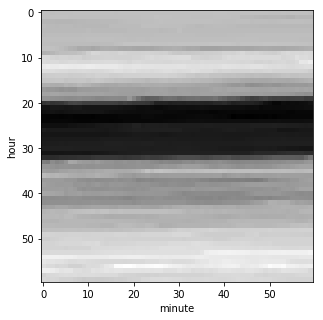

In [72]:
fig, axes= plt.subplots(figsize=(5,5))
axes.imshow(X_batches_norm[0], cmap="gray")
axes.set_ylabel("hour")
axes.set_xlabel("minute")
plt.show()

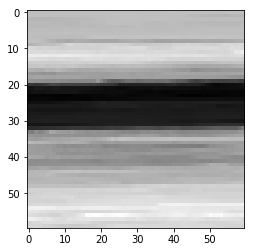

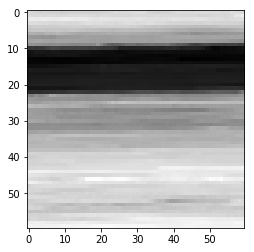

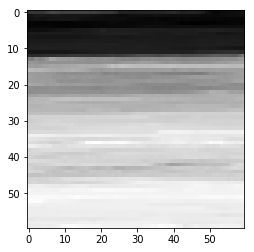

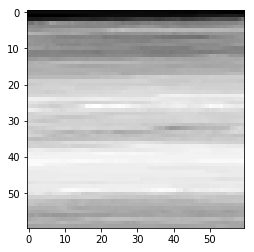

In [65]:
import matplotlib.pyplot as plt
for i in [0,10,20,30]:
    plt.imshow(X_batches_norm[i], cmap="gray")
    plt.show()